# PCA

**PCA(Principal Component Analysis)는 주성분 분석**이라고도 하며 다차원의 정보가 주어졌을 때 원래의 데이터와 가장 비슷하면서 원래의 차원보다 낮은 차원의 데이터를 찾아내는 방법이다. **차원축소(dimension reduction)**라고도 한다.

차원축소의 원리는 다음과 같다.

$N$개의 $M$차원 데이터가 있으면 보통 그 데이터들은 서로 다른 값을 가진다. 하지만 서로 다른 데이터가 아무렇게나 서로 다르지는 않다. 데이터가 생겨난 물리적, 사회적 원인에 의해 "다른" 데이터도 "어떻게 다른지" 규칙이 존재하는 경우가 있다. 이 규칙을 찾아내는 것이 PCA이다.

## 붓꽃 데이터의 차원축소

Scikit-Learn의 붓꽃 데이터 중에서 10송이의 데이터, 즉 10개의 표본만 선택하여 꽃잎의 길이와 꽃입의 폭 데이터를 그래프로 보이면 다음과 같다.

In [3]:
!pip install seaborn==0.9.0

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()



In [0]:
%matplotlib inline  


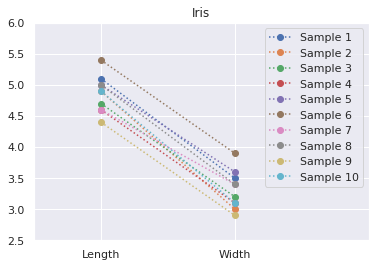

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()
N = 10  # 앞의 10송이만 선택
X = iris.data[:N, :2]  # 꽃잎의 길와 꽃잎의 폭만 선택

plt.plot(X.T, 'o:')
plt.xticks(range(4), ["Length", "Width"])
plt.xlim(-0.5, 2)
plt.ylim(2.5, 6)
plt.title("Iris")
plt.legend(["Sample {}".format(i + 1) for i in range(N)])
plt.show()

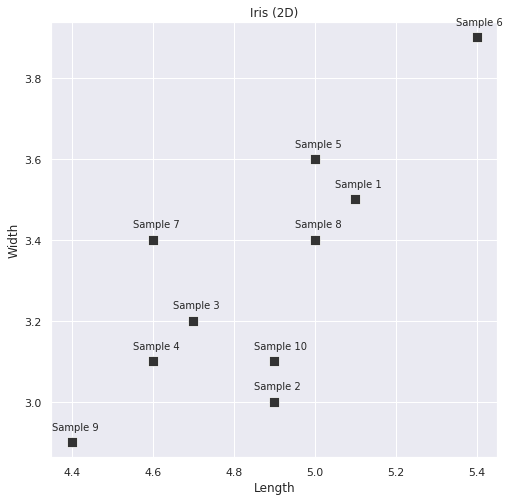

In [14]:
plt.figure(figsize=(8, 8))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")
for i in range(N):
    ax.text(X[i, 0] - 0.05, X[i, 1] + 0.03, "Sample {}".format(i + 1))
plt.xlabel("Length")
plt.ylabel("Width")
plt.title("Iris (2D)")
plt.axis("equal")
plt.show()

### Scikit-Learn 의 PCA 기능

Scikit-Learn 의 decomposition 서브패키지는 PCA분석을 위한 `PCA` 클래스를 제공한다. 사용법은 다음과 같다.


* 입력 인수:	
  * `n_components` : 정수

* 메서드:	
  * `fit_transform` : 특징행렬을 낮은 차원의 근사행렬로 변환
  * `inverse_transform` : 변환된 근사행렬을 원래의 차원으로 복귀

* 속성:	
 * `mean_` : 평균 벡터
 * `components_` : 주성분 벡터

이 명령으로 붓꽃 데이터를 1차원 근사하면 다음과 같다. 

`X_low`는 1차원 근사 데이터의 집합이고 `X2`는 다시 2차원으로 복귀한 근사 데이터의 집합이다.

In [0]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components=1)
X_low = pca1.fit_transform(X)
X2 = pca1.inverse_transform(X_low)

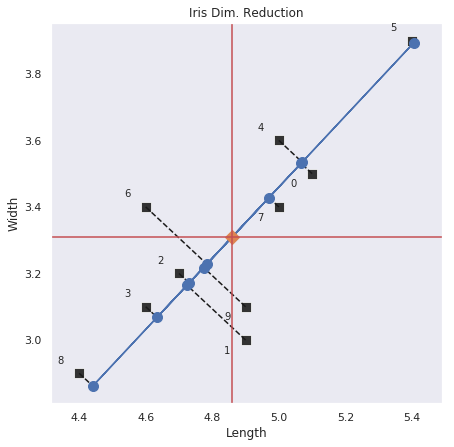

In [12]:
plt.figure(figsize=(7, 7))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")
for i in range(N):
    d = 0.03 if X[i, 1] > X2[i, 1] else -0.04
    ax.text(X[i, 0] - 0.065, X[i, 1] + d, "{}".format(i))
    plt.plot([X[i, 0], X2[i, 0]], [X[i, 1], X2[i, 1]], "k--")
plt.plot(X2[:, 0], X2[:, 1], "o-", markersize=10)
plt.plot(X[:, 0].mean(), X[:, 1].mean(), markersize=10, marker="D")
plt.axvline(X[:, 0].mean(), c='r')
plt.axhline(X[:, 1].mean(), c='r')
plt.grid(False)
plt.xlabel("Length")
plt.ylabel("Width")
plt.title("Iris Dim. Reduction")
plt.axis("equal")
plt.show()



### Principal  **Components**
가장 근사값을 만드는 투영벡터는 (0.68, 0.73)이다.

In [13]:
pca1.components_

array([[0.68305029, 0.73037134]])

## SVD를 이용한 PCA

이 값은 평균을 제거한 특징행렬의 첫번째 오른쪽 특이벡터 또는 그 행렬의 공분산행렬의 첫번째(가장 큰 고윳값에 대응하는) 고유벡터에 해당한다. 고유벡터의 부호 즉 방향은 반대가 될 수도 있다.

NumPy로 첫번째 오른쪽 특이벡터를 구하면 (0.68, 0.73)임을 알 수 있다.

In [25]:
# shift
X0 = X - X.mean(axis=0)
# SVD
U, S, V = np.linalg.svd(X0)
V

array([[-0.68305029, -0.73037134],
       [-0.73037134,  0.68305029]])

## Covariance, 고유값분해(Eigen decomposition)를 이용한 PCA

In [0]:
# shift
X0 = X - X.mean(axis=0)
# Covariance 
XCOV = X0.T.dot(X0)
# Eigen decomposition
W, V = np.linalg.eig(XCOV)
# W - eigen value
# V - eigen vector

In [22]:
W

array([0.17107711, 1.44192289])

In [23]:
V

array([[-0.73037134, -0.68305029],
       [ 0.68305029, -0.73037134]])

In [24]:
# 가장 큰 eigen value를 가지는 것이 가장 중요한 PC
V[:, np.argmax(W)]

array([-0.68305029, -0.73037134])